<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h2 align="center">Boston House price</h2>
    <h3 align="center">SeyedeMelika Ranaei Siadat</h3>
</div>

# Boston House Dataset

<img src="https://thinkingneuron.com/wp-content/uploads/2020/09/Boston-house-price-prediction.png" width=75% />

# About boston Dataset

This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.

- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town.
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways
- TAX: This is the full-value property-tax rate per $10,000
- PTRATIO: This is the pupil-teacher ratio by town
- B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
- LSTAT: This is the percentage lower status of the population


<div class="alert alert-block alert-success">
    <h1 align="center">Importing the libraries</h1>
</div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<div class="alert alert-block alert-success">
    <h1 align="center">Load and Prepare Data</h1>
</div>

In [2]:
from sklearn import datasets
from sklearn.datasets import load_boston
boston=load_boston()

<div class="alert alert-block alert-success">
    <h1 align="center">EDA (Use Pandas)</h1>
</div>

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
data = pd.DataFrame(boston.data , columns=boston.feature_names)

In [6]:
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
406,20.71620,0.0,18.10,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34
328,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4.0,430.0,16.9,382.44,9.97
79,0.08387,0.0,12.83,0.0,0.437,5.874,36.6,4.5026,5.0,398.0,18.7,396.06,9.10
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97
184,0.08308,0.0,2.46,0.0,0.488,5.604,89.8,2.9879,3.0,193.0,17.8,391.00,13.98


In [7]:
data.shape

(506, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
data['Price'] = boston.target

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [12]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [13]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [15]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

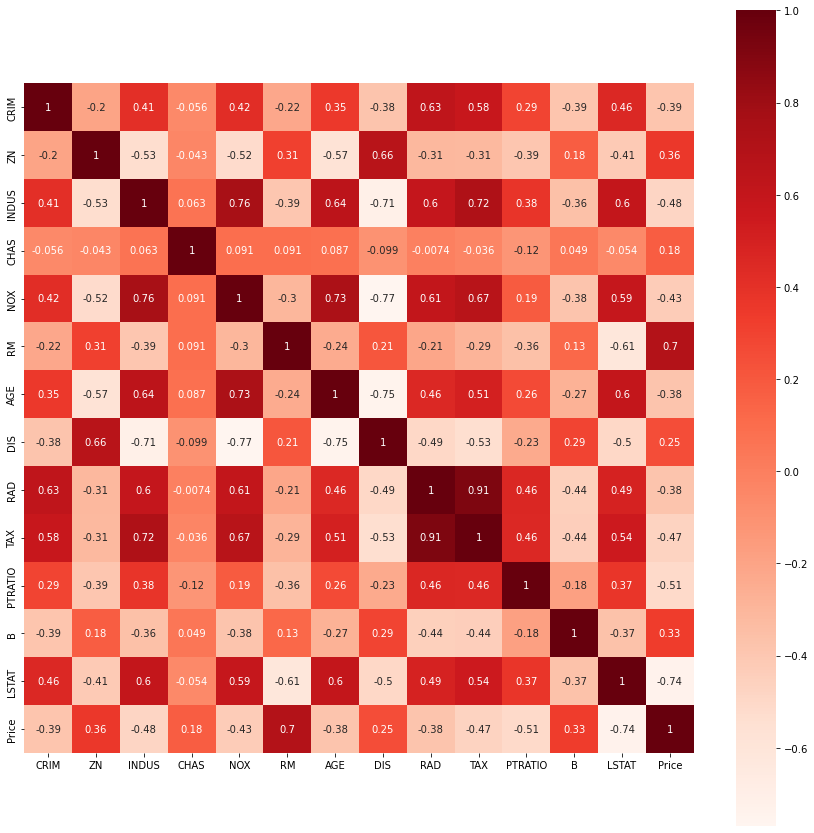

In [16]:
plt.figure(figsize=(15,15))
corr=data.corr()
sns.heatmap(corr,square=True , annot=True  , cmap='Reds')

In [17]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<div class="alert alert-block alert-success">
    <h1 align="center">Training model
</h1>
</div>

# Simple linear regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
x = data[['LSTAT']]
y=data[['Price']]

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)

In [21]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
regressor.intercept_


array([34.34642188])

In [23]:
regressor.coef_

array([[-0.93622037]])

In [24]:
coefficient = pd.DataFrame([x.columns , regressor.coef_]).T
coefficient = coefficient.rename(columns={0 : 'Attribute' , 1 : 'Coefficients'})
coefficient

,Attribute,Coefficients
0,LSTAT,[-0.9362203689997229]


## Model  Evaluation on train data

In [25]:
y_pred = regressor.predict(x_train)

<AxesSubplot:ylabel='Count'>

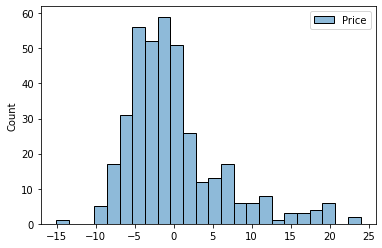

In [26]:
sns.histplot(y_train - y_pred)

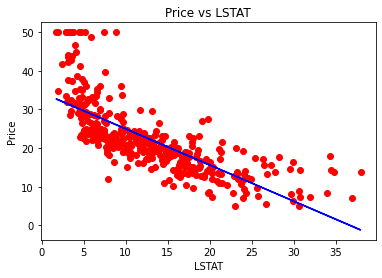

In [27]:
plt.scatter(x_train , y_train , color='red')
plt.plot(x_train , y_pred , color ='blue')
plt.title('Price vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

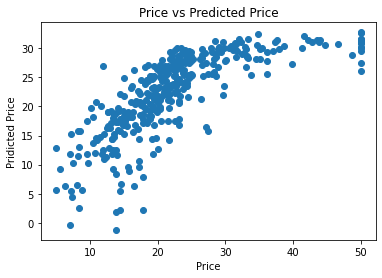

In [28]:
plt.scatter(y_train , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Pridicted Price')
plt.show()

In [29]:
print('R^2 : ' , metrics.r2_score(y_train , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_train , y_pred))
print('MSE : ' , metrics.mean_squared_error(y_train , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_train , y_pred)))

R^2 :  0.5478579583420593
MAE :  4.5051340460550895
MSE :  38.45974000924018
RMSE :  6.201591731905623


## Model  Evaluation on test data

In [30]:
y_pred = regressor.predict(x_test)

<AxesSubplot:ylabel='Count'>

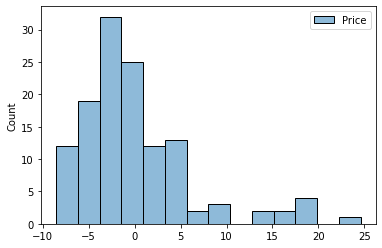

In [31]:
sns.histplot(y_test - y_pred)

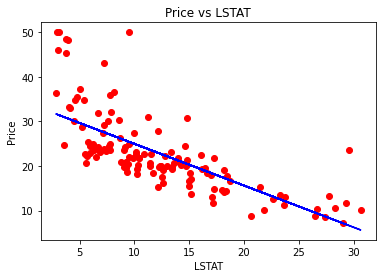

In [32]:
plt.scatter(x_test , y_test , color='red')
plt.plot(x_test , y_pred , color='blue')
plt.title('Price vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

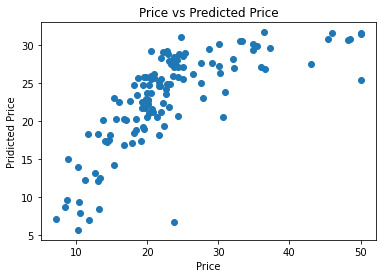

In [33]:
plt.scatter(y_test , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Pridicted Price')
plt.show()

In [34]:
print('R^2 : ' , metrics.r2_score(y_test , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_test , y_pred))
print('MSE : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

R^2 :  0.5303215448532586
MAE :  4.447271964673958
MSE :  38.59525469567654
RMSE :  6.21250792318823


# Multiple linear regression 

In [35]:
X = data.iloc[: , :-1]

In [36]:
y = data['Price']

In [37]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [38]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [39]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=26)

In [40]:
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [41]:
coefficient = pd.DataFrame([x_train.columns , regressor.coef_]).T
coefficient = coefficient.rename(columns={0 : 'Attr' , 1 : 'Coeff'})
coefficient

,Attr,Coeff
0,CRIM,-0.114426
1,ZN,0.032219
2,INDUS,0.028868
3,CHAS,3.481292
4,NOX,-16.971589
5,RM,4.402872
6,AGE,-0.008414
7,DIS,-1.436074
8,RAD,0.236626
9,TAX,-0.010431


## Model  Evaluation on train data

In [42]:
y_pred = regressor.predict(x_train)

<AxesSubplot:xlabel='Price', ylabel='Count'>

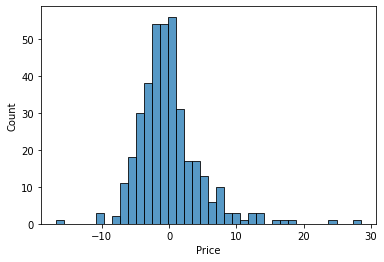

In [43]:
sns.histplot(y_train - y_pred)

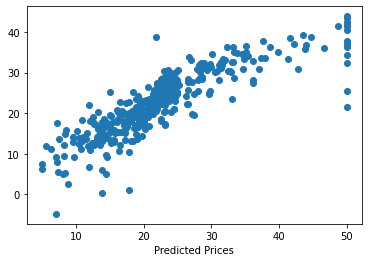

In [44]:
plt.scatter(y_train , y_pred)
plt.xlabel('Prices')
plt.xlabel('Predicted Prices')
plt.show()

In [45]:
print('R^2 : ' , metrics.r2_score(y_train , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_train , y_pred))
print('MSE : ' , metrics.mean_squared_error(y_train , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_train , y_pred)))

R^2 :  0.7398592666295977
MAE :  3.250956525740685
MSE :  22.127880288574868
RMSE :  4.704028091813958


## Model  Evaluation on test data

In [46]:
y_pred = regressor.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Count'>

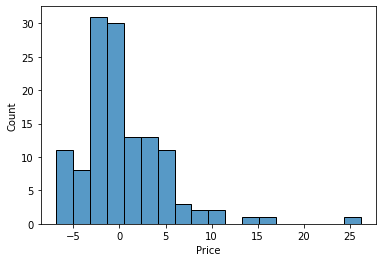

In [47]:
sns.histplot(y_test - y_pred)

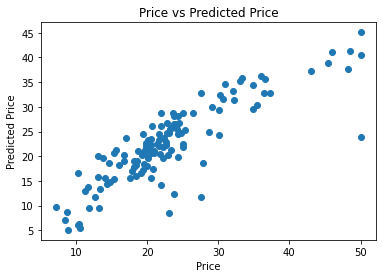

In [48]:
plt.scatter(y_test , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

In [49]:
print('R^2 : ' , metrics.r2_score(y_test , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_test , y_pred))
print('MSE : ' , metrics.mean_squared_error(y_test , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))

R^2 :  0.7280271832946519
MAE :  3.223533306147867
MSE :  22.349034783304948
RMSE :  4.727476576706112


# Polynomial regression -Degree 2

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
x = data[['RM']]
y = data['Price']

In [52]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)

In [53]:
poly_feature = PolynomialFeatures(degree=2)
x_train_quadratic = poly_feature.fit_transform(x_train)
quadratic = LinearRegression()
quadratic.fit(x_train_quadratic , y_train)

LinearRegression()

In [54]:
quadratic.intercept_

40.11492583966596

In [55]:
quadratic.coef_

array([  0.        , -14.43824734,   1.82295138])

## Model  Evaluation on train data

In [56]:
y_pred = quadratic.predict(x_train_quadratic)

<AxesSubplot:xlabel='Price', ylabel='Count'>

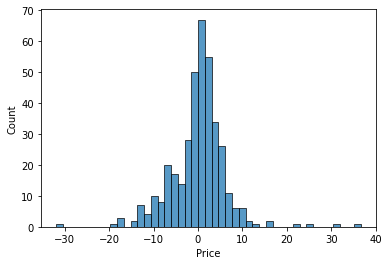

In [57]:
sns.histplot(y_train - y_pred)

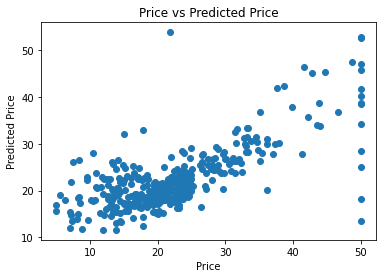

In [58]:
plt.scatter(y_train , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

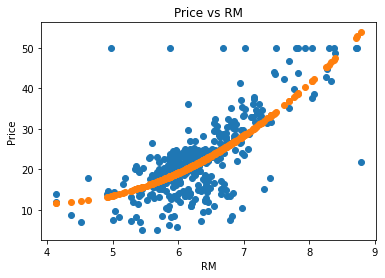

In [59]:
plt.scatter(x_train , y_train)
plt.scatter(x_train , y_pred)
plt.title('Price vs RM')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

In [60]:
print(f'MAE : {metrics.mean_absolute_error(y_train , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_train , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_train , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_train , y_pred)}')

MAE : 4.268513478866645
MSE : 40.152122975801625
RMSE : 6.336570284925562
R^2 : 0.527961893272863


## Model  Evaluation on test data

In [61]:
x_test_quadratic = poly_feature.fit_transform(x_test)

In [62]:
y_pred = quadratic.predict(x_test_quadratic)

<AxesSubplot:xlabel='Price', ylabel='Count'>

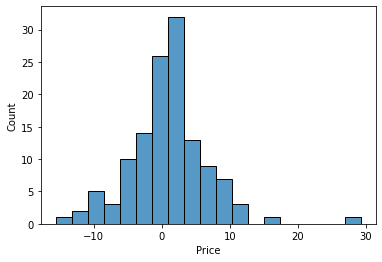

In [63]:
sns.histplot(y_test - y_pred)

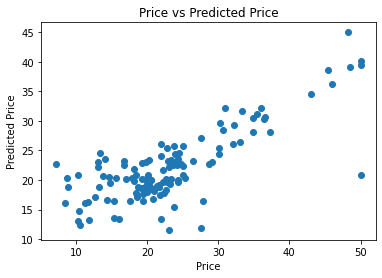

In [64]:
plt.scatter(y_test , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

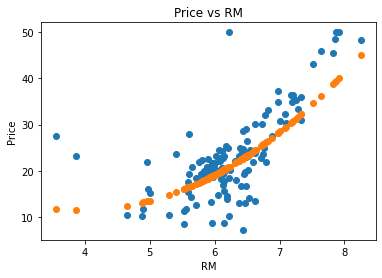

In [65]:
plt.scatter(x_test , y_test)
plt.scatter(x_test , y_pred)
plt.title('Price vs RM')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

In [66]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 4.214100600084425
MSE : 33.85163000934446
RMSE : 5.818215362922247
R^2 : 0.5880482869628778


# Polynomial regression - Degree 3

In [67]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=26)

In [68]:
poly_feature = PolynomialFeatures(degree=3)
x_train_quadratic = poly_feature.fit_transform(x_train)

In [69]:
quadratic = LinearRegression()
quadratic.fit(x_train_quadratic , y_train)

LinearRegression()

In [70]:
quadratic.intercept_

225.0036575175276

In [71]:
quadratic.coef_

array([   0.        , -102.86295191,   15.6861393 ,   -0.71218968])

## Model  Evaluation on train data

In [72]:
y_pred = quadratic.predict(x_train_quadratic)

<AxesSubplot:xlabel='Price', ylabel='Count'>

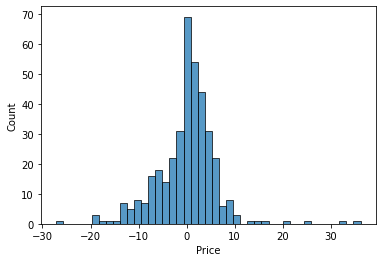

In [73]:
sns.histplot(y_train - y_pred)

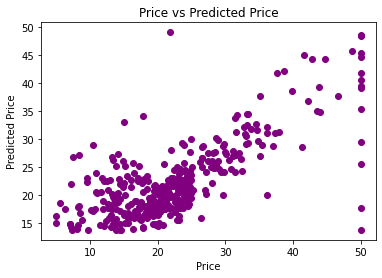

In [74]:
plt.scatter(y_train , y_pred,color='purple')
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

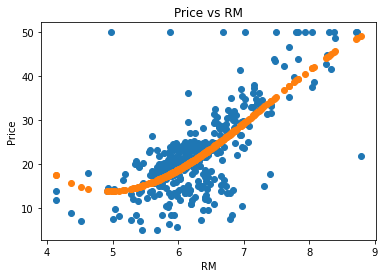

In [75]:
plt.scatter(x_train , y_train)
plt.scatter(x_train , y_pred)
plt.title('Price vs RM')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

In [76]:
print(f'MAE : {metrics.mean_absolute_error(y_train , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_train , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_train , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_train , y_pred)}')

MAE : 4.27102854108163
MSE : 39.44404511355234
RMSE : 6.280449435633754
R^2 : 0.5362862285443251


## Model  Evaluation on test data

In [77]:
y_pred = quadratic.predict(poly_feature.fit_transform(x_test))

<AxesSubplot:xlabel='Price', ylabel='Count'>

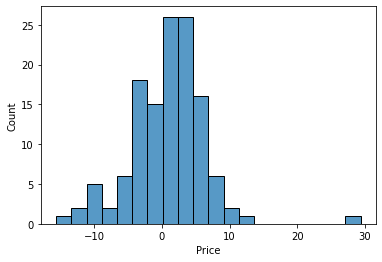

In [78]:
sns.histplot(y_test - y_pred)

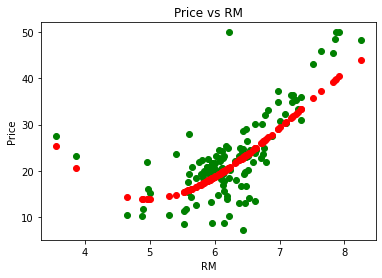

In [79]:
plt.scatter(x_test , y_test,color='green')
plt.scatter(x_test , y_pred,color='red')
plt.title('Price vs RM')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

In [80]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 4.0464963113954
MSE : 30.43229217274519
RMSE : 5.516547124129838
R^2 : 0.6296593431764452


# Polynomial regression (All Features)

In [81]:
x = data.iloc[: , :-1]
y = data['Price']

In [82]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , random_state=26)
poly_feature = PolynomialFeatures(degree=2)
x_train_quadratic = poly_feature.fit_transform(x_train)
quadratic = LinearRegression()
quadratic.fit(x_train_quadratic , y_train)

LinearRegression()

In [83]:
quadratic.intercept_

790242763.584108

In [84]:
quadratic.coef_

array([-7.90242936e+08, -1.67125931e+00,  3.08137080e-01, -5.21716116e+00,
        2.87862004e+01,  1.65139850e+02,  2.12459584e+01,  1.10994322e+00,
       -8.60889885e+00,  2.80642379e+00, -9.93253235e-02,  6.81842199e+00,
        1.25352122e-01,  5.92162793e-01,  1.86132455e-03,  3.84055612e-02,
        6.19058760e-01,  2.30893375e+00, -9.07799946e-01,  9.80224326e-02,
        3.98621931e-03,  6.22708931e-02,  4.95935871e-01, -4.50933284e-02,
        3.83123516e-01, -2.18174168e-04,  8.03006415e-03,  5.24153224e-04,
       -9.98927795e-03,  4.04522493e-03, -9.24178076e-01, -7.07757706e-02,
        5.26474874e-04, -2.51627651e-02, -1.01270828e-03,  4.41080852e-04,
       -1.05023129e-02,  1.93299983e-03, -7.63238807e-05, -8.37754301e-04,
       -3.75914910e-02,  1.77421496e+00,  1.60661888e-01,  7.44847915e-03,
        1.59466214e-01,  5.09052428e-03,  1.17290611e-03,  1.53130354e-03,
        4.83749621e-03,  2.67047525e-03,  2.87861975e+01, -3.47546086e+01,
       -5.36673377e+00, -

## Model  Evaluation on train data

In [85]:
y_pred = quadratic.predict(x_train_quadratic)

<AxesSubplot:xlabel='Price', ylabel='Count'>

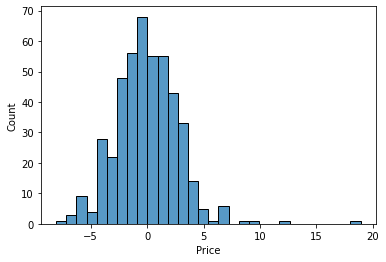

In [86]:
sns.histplot(y_train - y_pred)

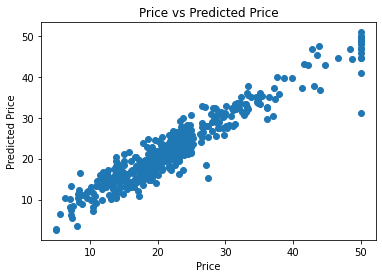

In [87]:
plt.scatter(y_train , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

In [88]:
print(f'MAE : {metrics.mean_absolute_error(y_train , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_train , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_train , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_train , y_pred)}')

MAE : 2.1281234983821493
MSE : 7.916928020906596
RMSE : 2.8137036128395962
R^2 : 0.9050839809976056


## Model  Evaluation on test data

In [89]:
y_pred = quadratic.predict(poly_feature.fit_transform(x_test))

<AxesSubplot:xlabel='Price', ylabel='Count'>

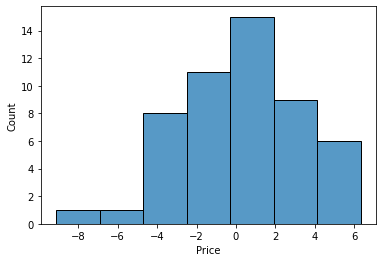

In [90]:
sns.histplot(y_test - y_pred)

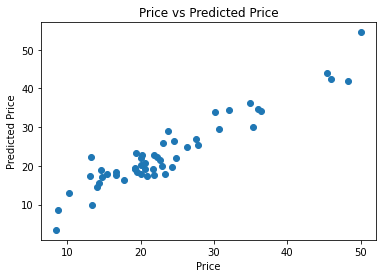

In [91]:
plt.scatter(y_test , y_pred)
plt.title('Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.show()

In [92]:
print(f'MAE : {metrics.mean_absolute_error(y_test , y_pred)}')
print(f'MSE : {metrics.mean_squared_error(y_test , y_pred)}')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test , y_pred))}')
print(f'R^2 : {metrics.r2_score(y_test , y_pred)}')

MAE : 2.5396736444211467
MSE : 9.897947184103646
RMSE : 3.146100313738207
R^2 : 0.8930254004049123


R^2 for CRIM : 0.21883300215024248
R^2 for ZN : 0.2428886912281254
R^2 for INDUS : 0.40999483100376377
R^2 for CHAS : 0.0847860432213915
R^2 for NOX : 0.2680532447280656
R^2 for RM : 0.6697835065756192
R^2 for AGE : 0.2135510595858624
R^2 for DIS : 0.1306663186714333
R^2 for RAD : 0.16790227263958557
R^2 for TAX : 0.29255204559239023
R^2 for PTRATIO : 0.4307921550505259
R^2 for B : 0.10632407813898659
R^2 for LSTAT : 0.6812014193170265


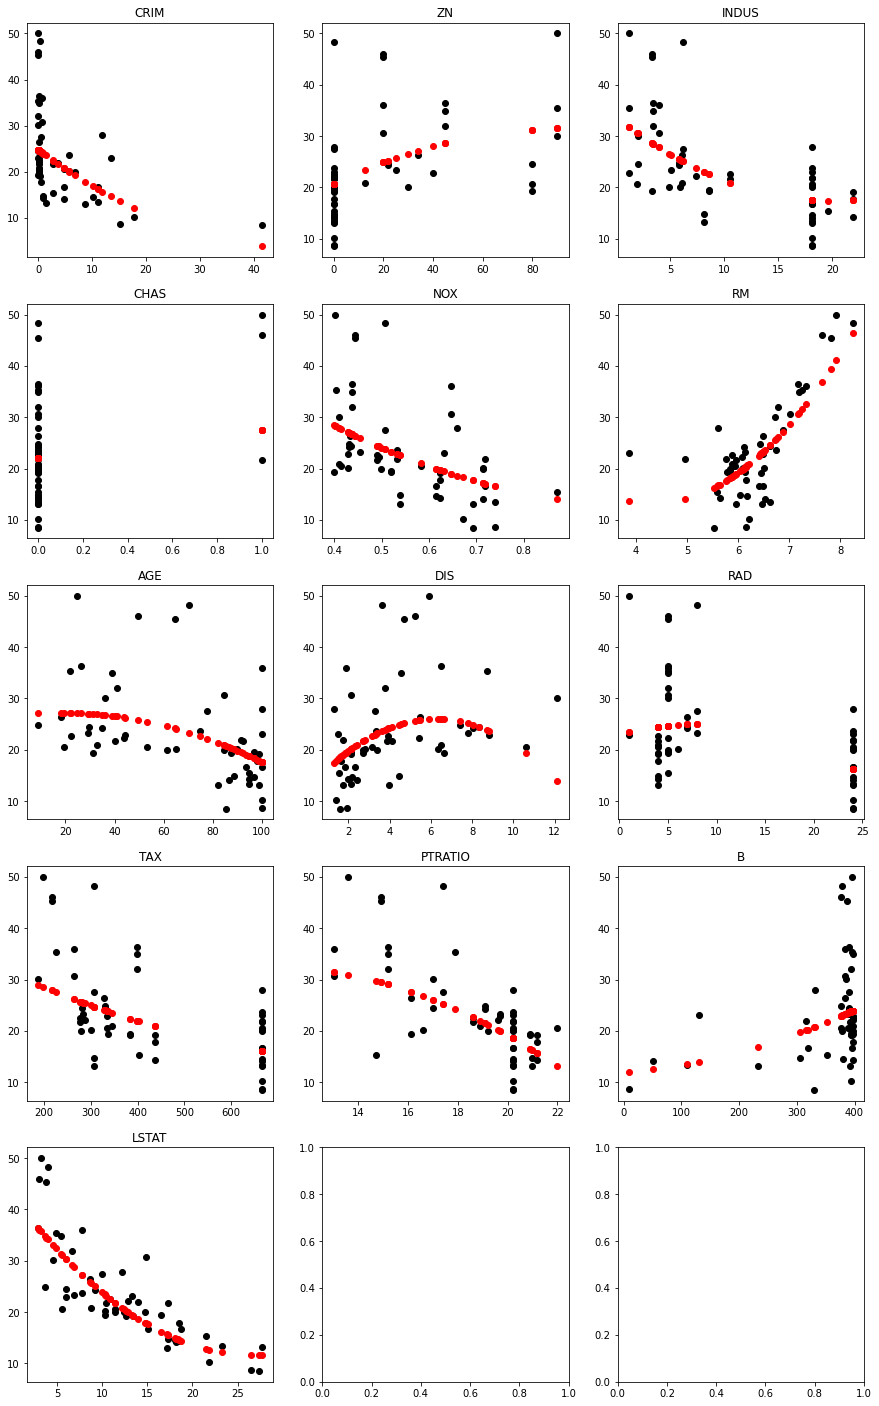

In [93]:
fig,ax = plt.subplots(5,3 , figsize=(15,25))
counter = 0

for i in range(0 , 5):
    for j in range(0 , 3):
        
        if counter == 13 :
            break
        
        # Selecting each feature for simple linear regression
        X = data[[x.columns[counter]]]
        
        # Splitting the data set into train and test 
        x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.1 , random_state=26)
        
        # Training model
        poly_feature = PolynomialFeatures(degree=2)
        x_train_quadratic = poly_feature.fit_transform(x_train)
        
        quadratic = LinearRegression()
        quadratic.fit(x_train_quadratic , y_train)
        
        # Predicting result with test
        y_pred = quadratic.predict(poly_feature.fit_transform(x_test))
        
        print(f'R^2 for {x.columns[counter]} : {metrics.r2_score(y_test , y_pred)}')
        
        ax[i,j].scatter(x_test , y_test , color='black')
        ax[i,j].scatter(x_test , y_pred , color='red')
        ax[i,j].set_title(x.columns[counter])
        counter +=1
        
plt.show()
